In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report

In [9]:
%pip install scikit-plot

In [10]:
df = pd.read_csv('email.csv', sep='\t', names=['Label','SMS'], encoding='latin-1')

In [11]:
df

,Label,SMS
0,"Category,Message",NaN
1,"ham,""Go until jurong point, crazy.. Available ...",NaN
2,"ham,Ok lar... Joking wif u oni...",NaN
3,"spam,Free entry in 2 a wkly comp to win FA Cup...",NaN
4,"ham,U dun say so early hor... U c already then...",NaN
...,...,...
5571,"ham,Will Ã¼ b going to esplanade fr home?",NaN
5572,"ham,""Pity, * was in mood for that. So...any ot...",NaN
5573,"ham,The guy did some bitching but I acted like...",NaN
5574,"ham,Rofl. Its true to its name",NaN


In [12]:
df['label']=df.Label.map({'ham':0, 'spam':1})

In [13]:
df.head()

,Label,SMS,label
0,"Category,Message",NaN,NaN
1,"ham,""Go until jurong point, crazy.. Available ...",NaN,NaN
2,"ham,Ok lar... Joking wif u oni...",NaN,NaN
3,"spam,Free entry in 2 a wkly comp to win FA Cup...",NaN,NaN
4,"ham,U dun say so early hor... U c already then...",NaN,NaN


In [14]:
df.shape

(5576, 3)

In [15]:
df.describe()

,label
count,2.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [16]:
df.groupby('Label').describe()

label                      \
                                                   count mean  std  min  25%   
Label                                                                          
Category,Message                                     0.0  NaN  NaN  NaN  NaN   
ham                                                  2.0  0.0  0.0  0.0  0.0   
ham,"&lt;#&gt;  is fast approaching. So, Wish u...   0.0  NaN  NaN  NaN  NaN   
ham,"&lt;#&gt; %of pple marry with their lovers...   0.0  NaN  NaN  NaN  NaN   
ham,"&lt;#&gt; , that's all? Guess that's easy ...   0.0  NaN  NaN  NaN  NaN   
...                                                  ...  ...  ...  ...  ...   
spam,todays vodafone numbers ending with 0089(m...   0.0  NaN  NaN  NaN  NaN   
spam,u r a winner U ave been specially selected...   0.0  NaN  NaN  NaN  NaN   
spam,wamma get laid?want real doggin locations ...   0.0  NaN  NaN  NaN  NaN   
spam,we tried to contact you re your response t...   0.0  NaN  NaN  NaN  NaN   
{"mode":"full","isActive":false}                     0.0  NaN  NaN  NaN  NaN   

                                                                   
                                                    50%  75%  max  
Label                                                              
Category,Message                                    NaN  NaN  NaN  
ham                                                 0.0  0.0  0.0  
ham,"&lt;#&gt;  is fast approaching. So, Wish u...  NaN  NaN  NaN  
ham,"&lt;#&gt; %of pple marry with their lovers...  NaN  NaN  NaN  
ham,"&lt;#&gt; , that's all? Guess that's easy ...  NaN  NaN  NaN  
...                                                 ...  ...  ...  
spam,todays vodafone numbers ending with 0089(m...  NaN  NaN  NaN  
spam,u r a winner U ave been specially selected...  NaN  NaN  NaN  
spam,wamma get laid?want real doggin locations ...  NaN  NaN  NaN  
spam,we tried to contact you re your response t...  NaN  NaN  NaN  
{"mode":"full","isActive":false}                    NaN  NaN  NaN  

[5160 rows x 8 columns]

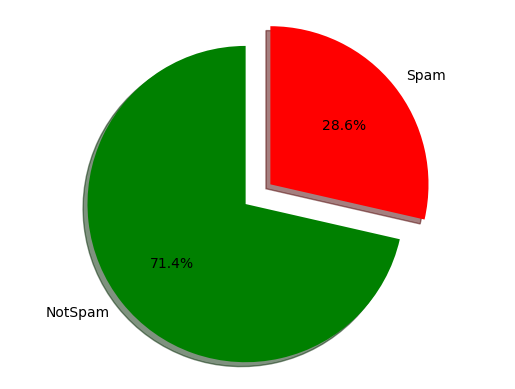

In [17]:
count_Class=pd.value_counts(df.Label, sort = True)
labels = "NotSpam", "Spam"
sizes = [count_Class[0], count_Class[1]]
colors = ['green', 'red']
explode = (0.1, 0.1)

plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True,startangle = 90)
plt.axis('equal')
plt.show()

In [18]:
documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']

lower_case_documents = []
for i in documents:
    lower_case_documents.append(i.lower())
print('The original documents',documents)
print()
print('After lower case process',lower_case_documents)

The original documents ['Hello, how are you!', 'Win money, win from home.', 'Call me now.', 'Hello, Call hello you tomorrow?']

After lower case process ['hello, how are you!', 'win money, win from home.', 'call me now.', 'hello, call hello you tomorrow?']


In [19]:
import string
sans_punctuation_documents = []
for i in lower_case_documents:
    translator = str.maketrans('', '', string.punctuation)
    sans_punctuation_documents.append(i.translate(translator))
print('After remove puctuation',sans_punctuation_documents)

After remove puctuation ['hello how are you', 'win money win from home', 'call me now', 'hello call hello you tomorrow']


In [20]:
preprocessed_documents = []
for i in sans_punctuation_documents:
    preprocessed_documents.append(i.split(' '))
print('Tokenization split into word',preprocessed_documents)

Tokenization split into word [['hello', 'how', 'are', 'you'], ['win', 'money', 'win', 'from', 'home'], ['call', 'me', 'now'], ['hello', 'call', 'hello', 'you', 'tomorrow']]


In [21]:
frequency_list = []
import pprint
from collections import Counter
for i in preprocessed_documents:
    frequency = Counter(i)
    frequency_list.append(frequency)
    
pprint.pprint(frequency_list)

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': 1})]


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
print(count_vector)
count_vector.fit(documents)
count_vector.get_feature_names_out()

CountVectorizer()


array(['are', 'call', 'from', 'hello', 'home', 'how', 'me', 'money',
       'now', 'tomorrow', 'win', 'you'], dtype=object)

In [23]:
doc_array = count_vector.transform(documents).toarray()
print("Doc array: \n", doc_array)

Doc array: 
 [[1 0 0 1 0 1 0 0 0 0 0 1]
 [0 0 1 0 1 0 0 1 0 0 2 0]
 [0 1 0 0 0 0 1 0 1 0 0 0]
 [0 1 0 2 0 0 0 0 0 1 0 1]]


In [24]:
frequency_matrix = pd.DataFrame(doc_array,columns = count_vector.get_feature_names_out())
print(frequency_matrix)

   are  call  from  hello  home  how  me  money  now  tomorrow  win  you
0    1     0     0      1     0    1   0      0    0         0    0    1
1    0     0     1      0     1    0   0      1    0         0    2    0
2    0     1     0      0     0    0   1      0    1         0    0    0
3    0     1     0      2     0    0   0      0    0         1    0    1


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['SMS'], 
                                                    df['Label'], 
                                                    random_state=1)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5576
Number of rows in the training set: 4182
Number of rows in the test set: 1394


In [26]:

X_train = [str(x) for x in X_train]
X_test = [str(x) for x in X_test]


In [27]:

count_vector = CountVectorizer()

training_data = count_vector.fit_transform(X_train)

testing_data = count_vector.transform(X_test)

In [28]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [29]:
predictions = naive_bayes.predict(testing_data)

In [41]:
new_test_sample_ham = ["I'm aishwarya"]

In [31]:
new_test_sample_spam = ["Congratulations, you've won a free Sony Camera"]

In [32]:
new_test_sample_ham_vectorized = count_vector.transform(new_test_sample_ham)

In [33]:
new_test_sample_spam_vectorized = count_vector.transform(new_test_sample_spam)

In [34]:
sample_predict = naive_bayes.predict(new_test_sample_ham_vectorized)

In [35]:
sample_predict

array(['ham,"Sorry, I\'ll call later"'], dtype='<U914')

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix


accuracy = accuracy_score(y_test, predictions)

conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.002152080344332855
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\Home\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Home\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Home\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Home\anaconda3\Lib\site-packages\IPython\core\pyl

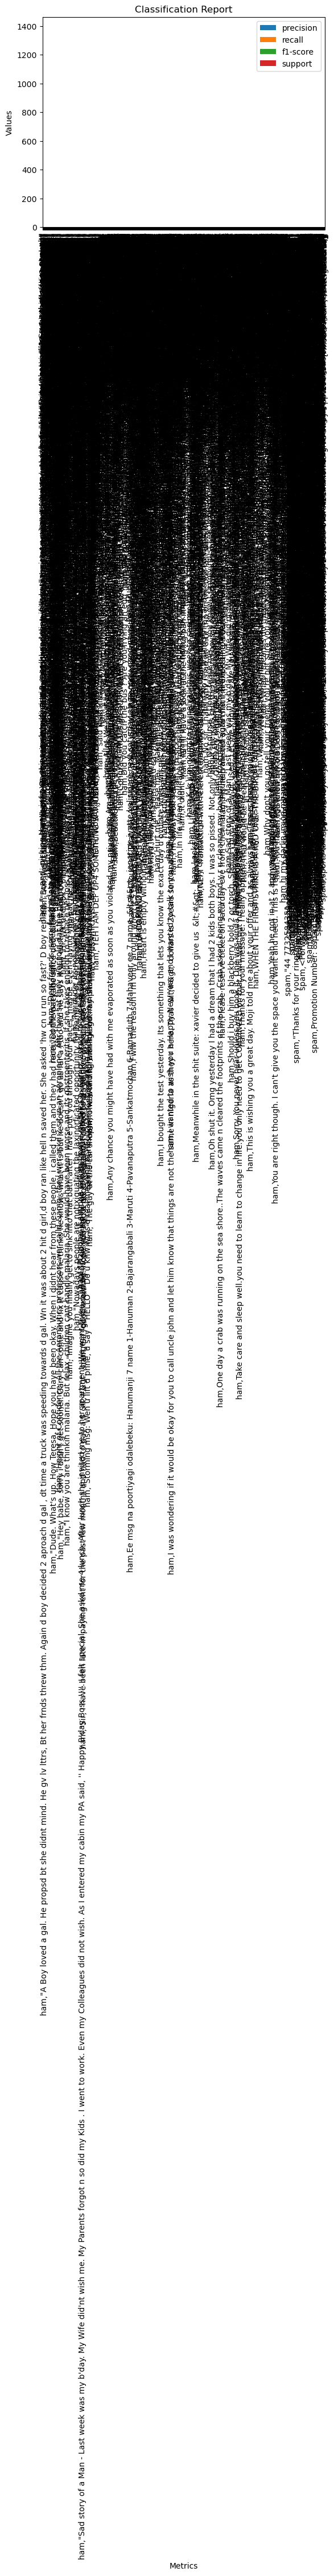

In [37]:
report = classification_report(y_test, predictions, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.plot(kind='bar')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Classification Report')
plt.show()

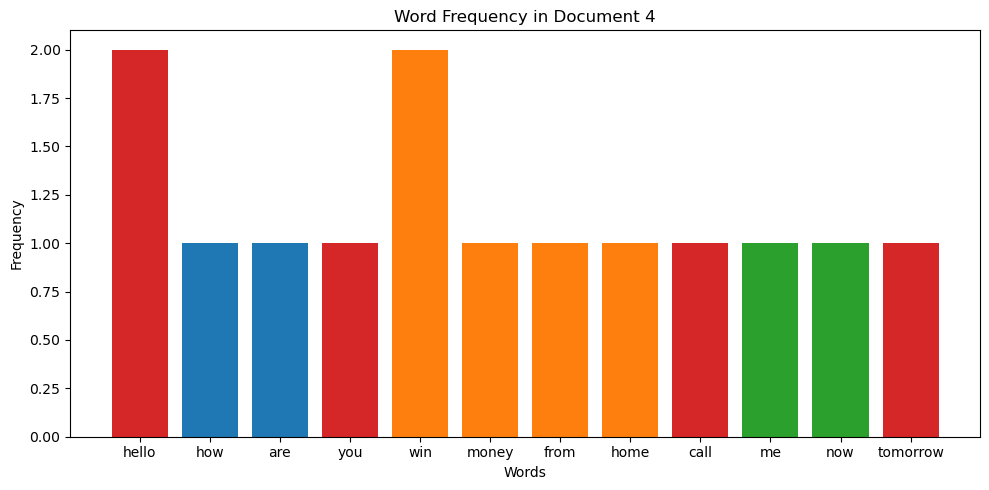

In [38]:
import matplotlib.pyplot as plt
from collections import Counter

# Preprocessed text data
documents = ['Hello, how are you!', 'Win money, win from home.', 'Call me now.', 'Hello, Call hello you tomorrow?']

# Preprocess the documents
lower_case_documents = [doc.lower() for doc in documents]
sans_punctuation_documents = [doc.translate(str.maketrans('', '', string.punctuation)) for doc in lower_case_documents]
preprocessed_documents = [doc.split() for doc in sans_punctuation_documents]

# Calculate word frequency
frequency_list = [Counter(doc) for doc in preprocessed_documents]

# Visualize word frequency as a bar chart
plt.figure(figsize=(10, 5))
for i, frequency in enumerate(frequency_list, start=1):
    words, counts = zip(*frequency.items())
    plt.bar(words, counts)
    plt.title("Word Frequency in Document {}".format(i))
    plt.xlabel("Words")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


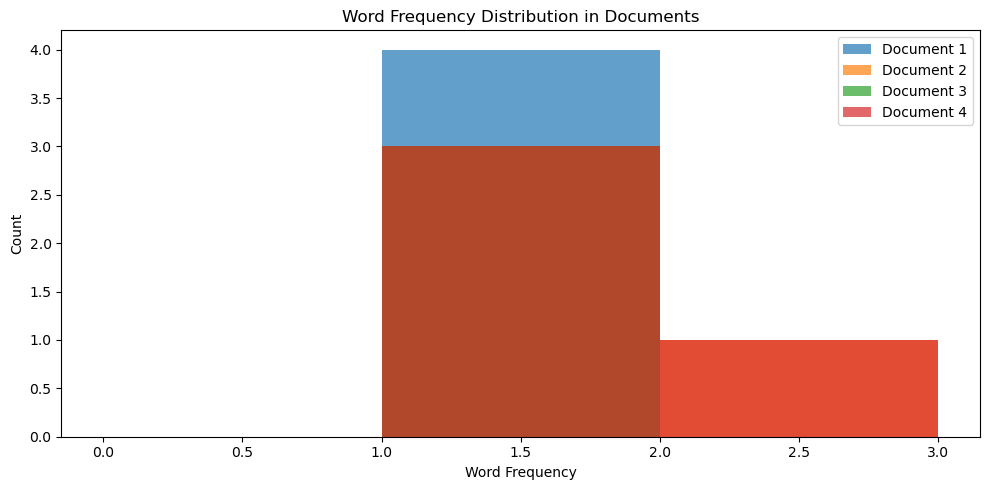

In [39]:
import matplotlib.pyplot as plt
from collections import Counter

# Preprocessed text data
documents = ['Hello, how are you!', 'Win money, win from home.', 'Call me now.', 'Hello, Call hello you tomorrow?']

# Preprocess the documents
lower_case_documents = [doc.lower() for doc in documents]
sans_punctuation_documents = [doc.translate(str.maketrans('', '', string.punctuation)) for doc in lower_case_documents]
preprocessed_documents = [doc.split() for doc in sans_punctuation_documents]

# Calculate word frequency
frequency_list = [Counter(doc) for doc in preprocessed_documents]

# Visualize word frequency distribution as histograms
plt.figure(figsize=(10, 5))
for i, frequency in enumerate(frequency_list, start=1):
    words, counts = zip(*frequency.items())
    plt.hist(counts, bins=range(max(counts) + 2), alpha=0.7, label="Document {}".format(i))
    plt.title("Word Frequency Distribution in Documents")
    plt.xlabel("Word Frequency")
    plt.ylabel("Count")
    plt.legend()
plt.tight_layout()
plt.show()


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report

# ... (Previous code)

# Predictions
predictions = naive_bayes.predict(testing_data)

# Map numeric labels to "ham" or "spam"
label_mapping = {0: "ham", 1: "spam"}
y_test_mapped = y_test.map(label_mapping)
predictions_mapped = pd.Series(predictions).map(label_mapping)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Print results
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)



Accuracy: 0.002152080344332855
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
